# **LC_50 Regression Code**

**Importing necessary packages**

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import svm

from sklearn.metrics import r2_score, mean_squared_error

**Importing data**

In [201]:
df = pd.read_csv('LC50_Regression_Data.csv')

In [202]:
df

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


## **Descriptive Statistics**

In [203]:
#Checking the datatypes of the features
df.dtypes

CIC0         float64
SM1_Dz(Z)    float64
GATS1i       float64
NdsCH          int64
NdssC          int64
MLOGP        float64
LC50         float64
dtype: object

In [204]:
#Checking for null/missing values in the columns
df.isnull().sum()

CIC0         0
SM1_Dz(Z)    0
GATS1i       0
NdsCH        0
NdssC        0
MLOGP        0
LC50         0
dtype: int64

In [205]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


## **Exploratory Data Analysis**

In [76]:
var_names = list(df.columns)
var_names.remove('LC50')

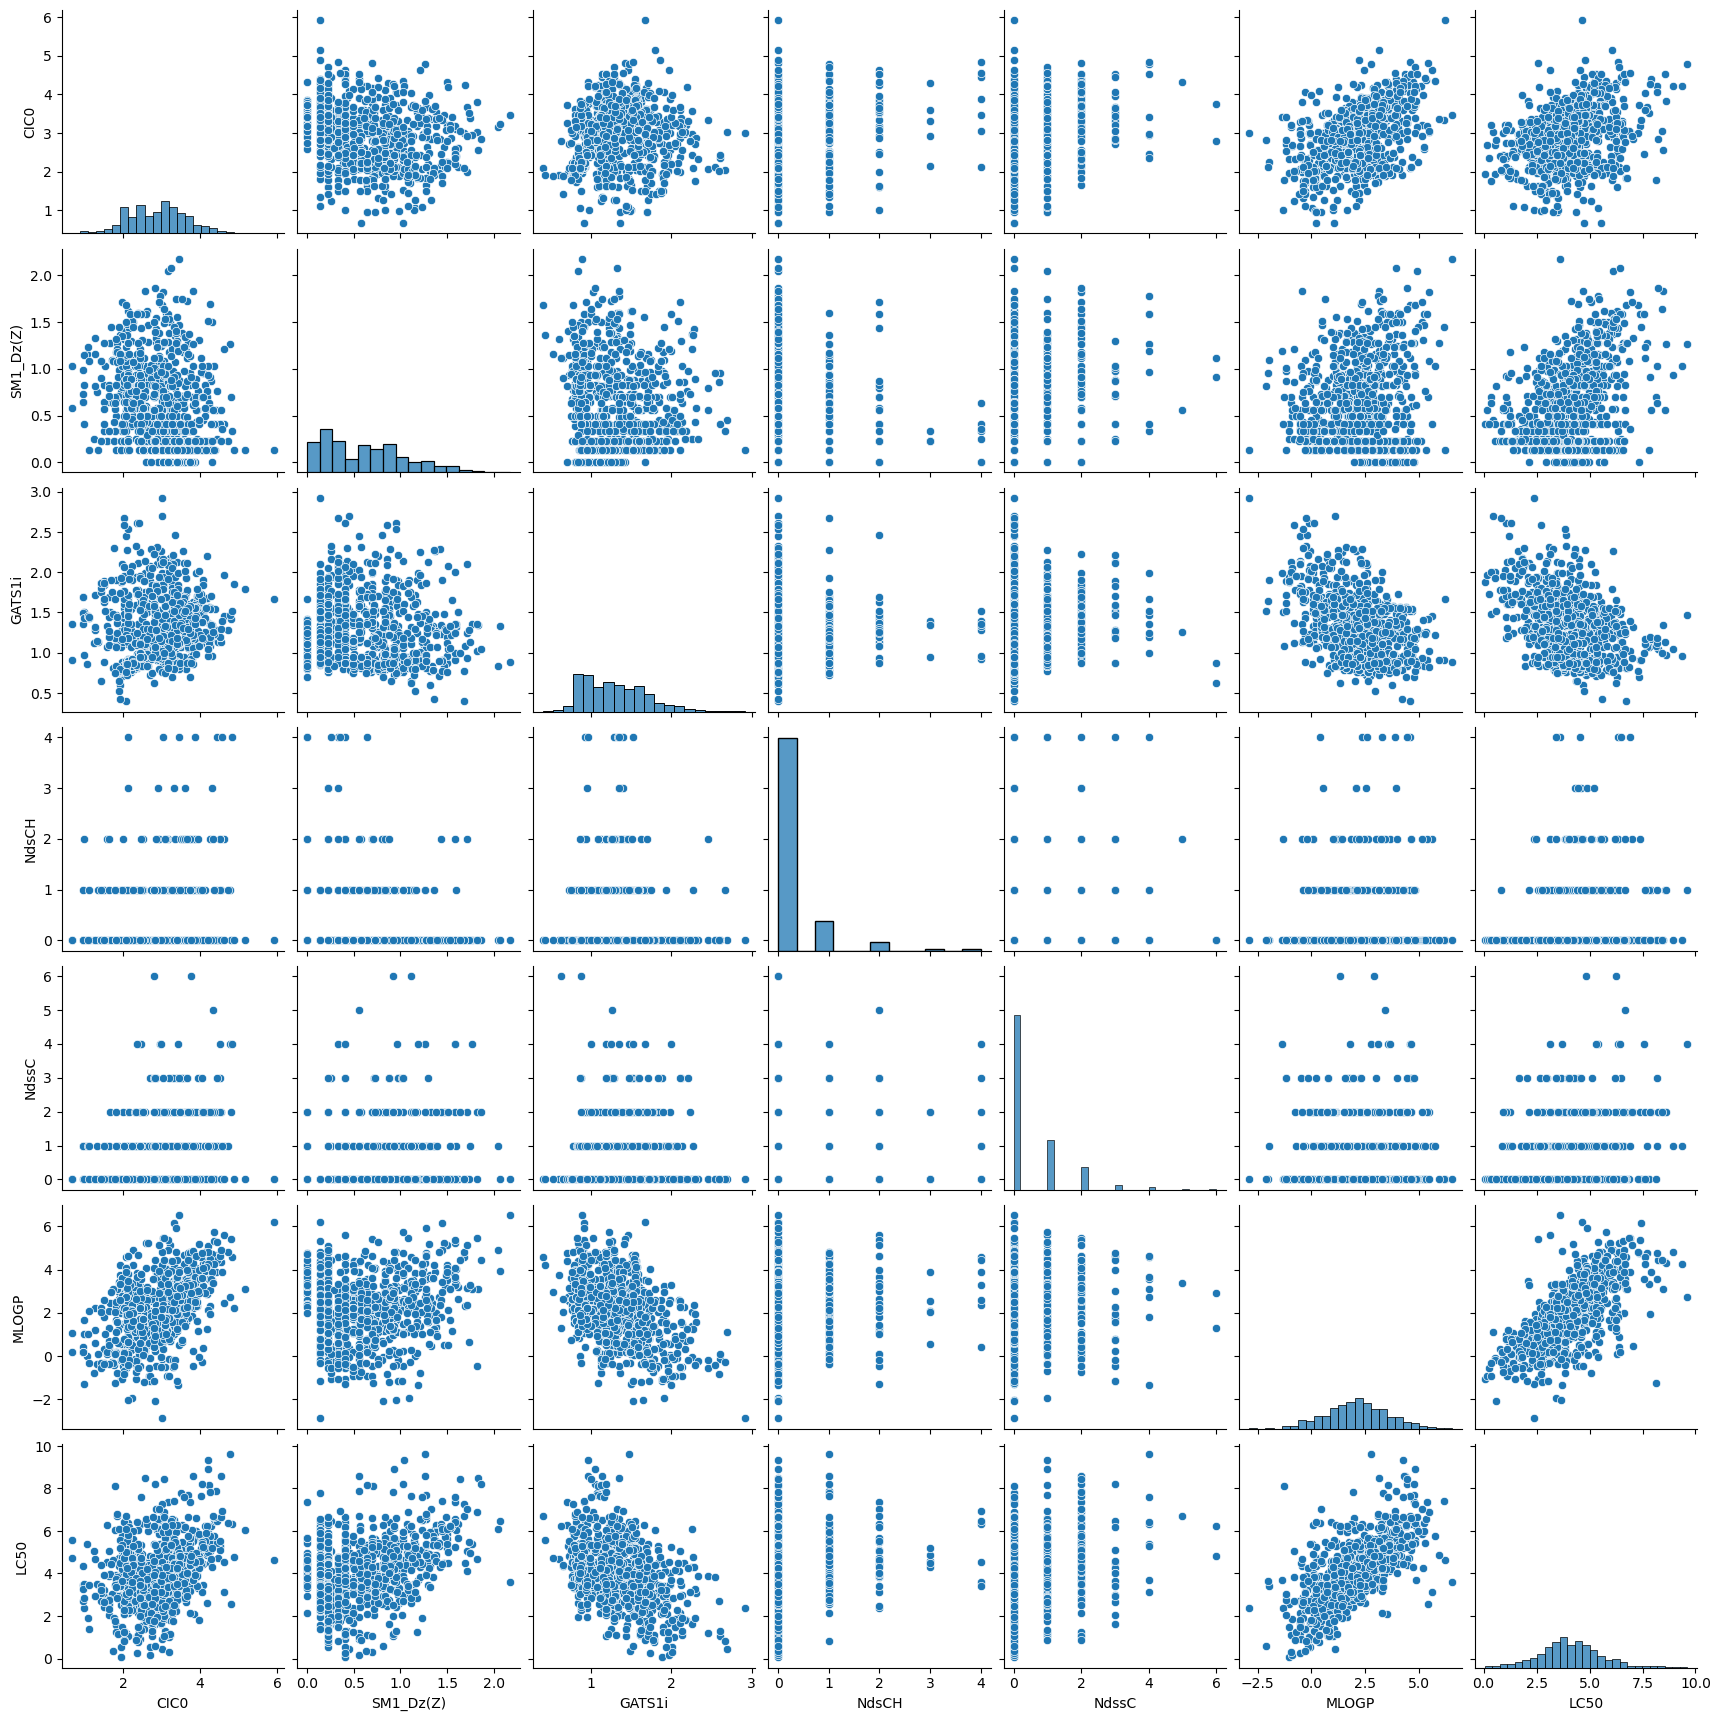

In [77]:
sns.pairplot(data=df)

Text(0.5, 0, 'LC50')

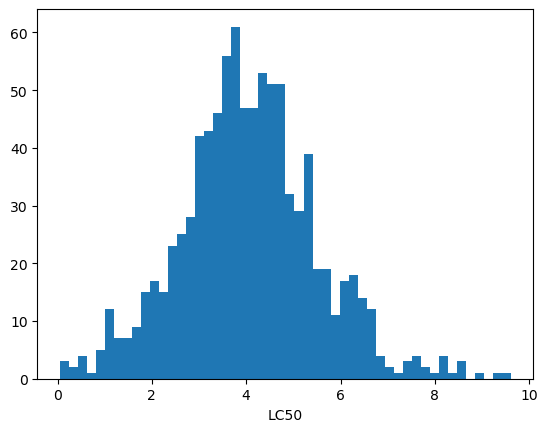

In [368]:
plt.hist(df['LC50'], bins=50)
plt.xlabel("LC50_ml_L")

A heatplot map to visualize the correlation between variables

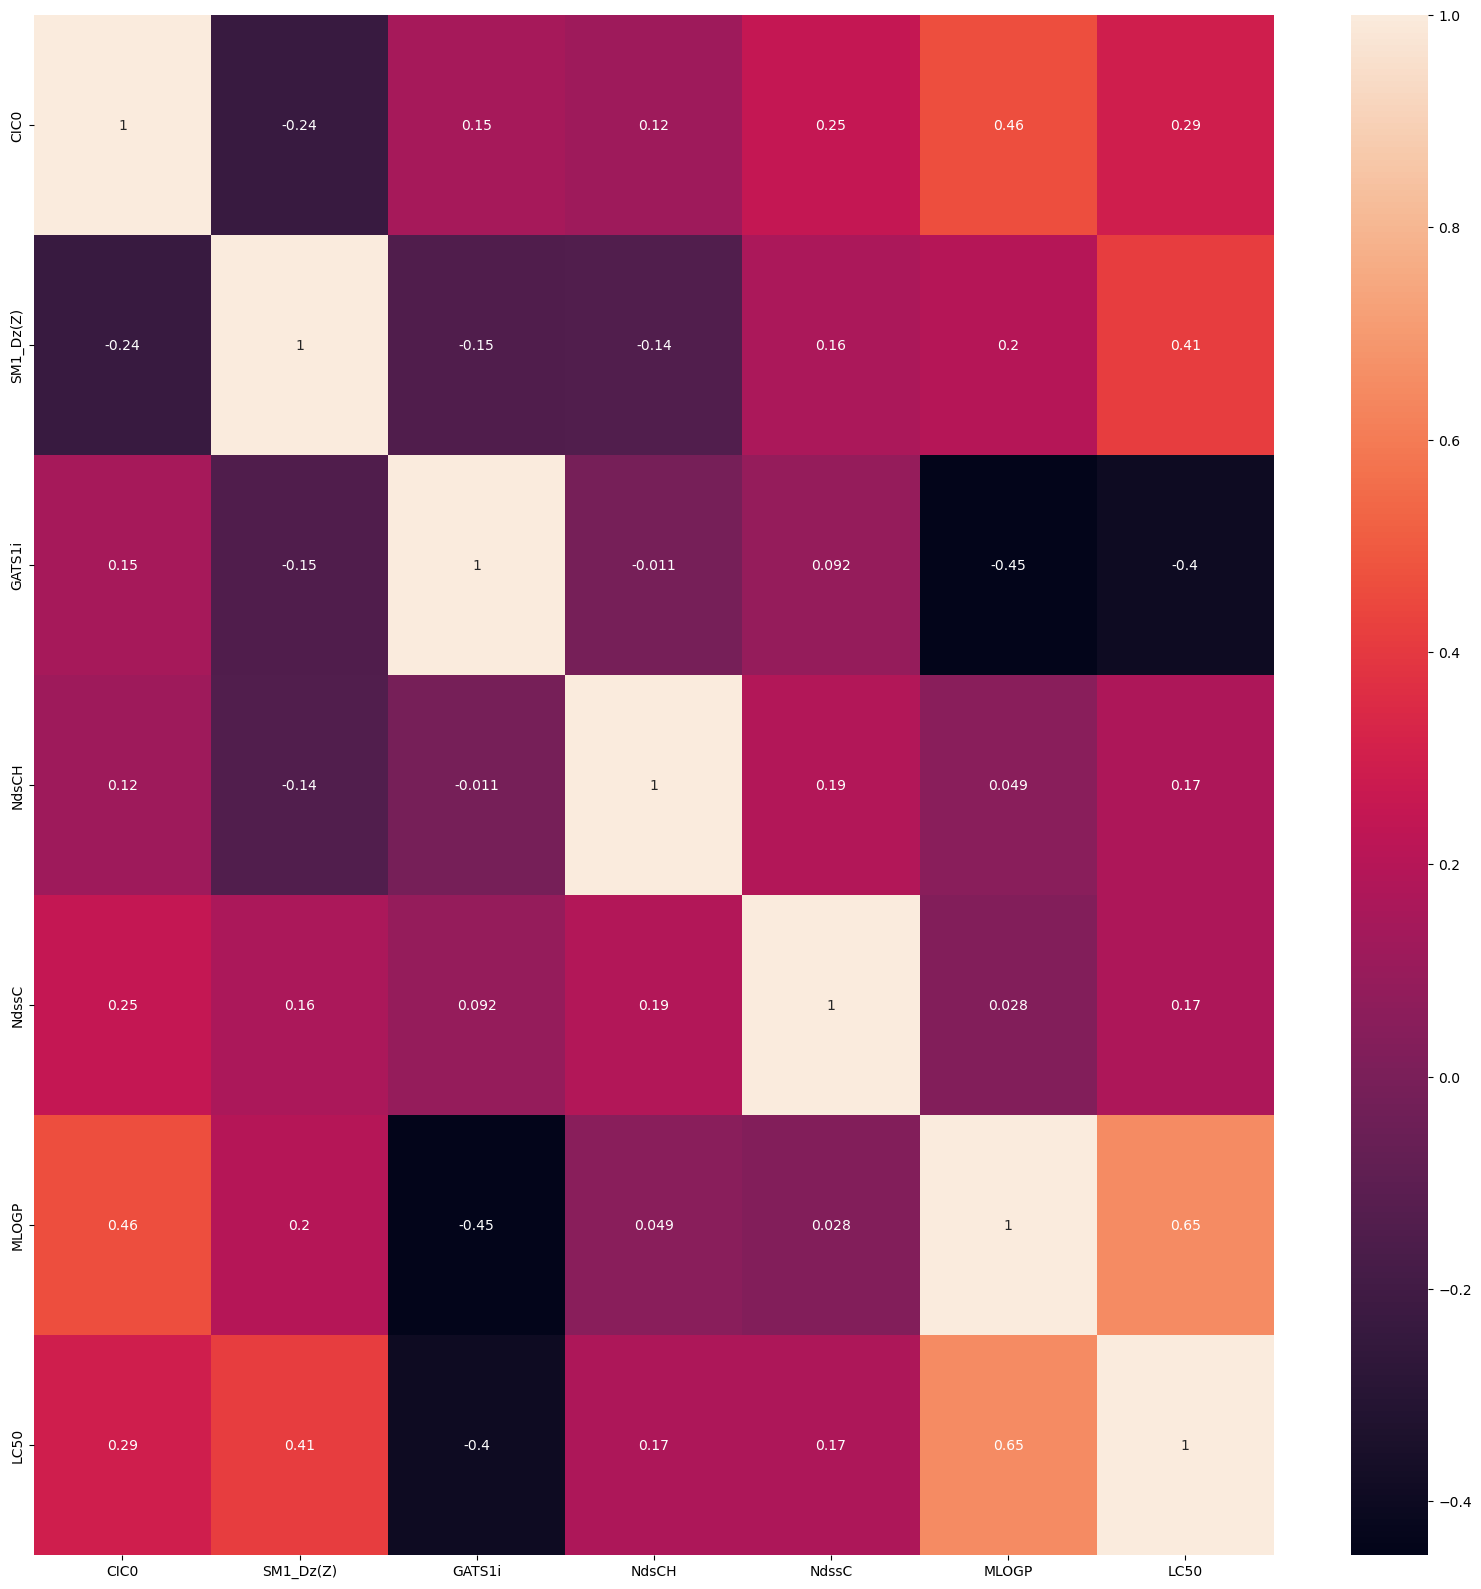

In [79]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)
plt.show()

## **Models (Only Important Variables)**

#### **Data Pre-processing**

In [206]:
x_data = df.iloc[:, 0:6]
y_data = pd.DataFrame(df['LC50'])

#scaler = MinMaxScaler()
#x_data = scaler.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
print("Number of training data points: " + str(len(y_train)))

Number of training data points: 726


In [111]:
# Outlier detection by using LOF
#LOF = LocalOutlierFactor()
#out_det = LOF.fit_predict(x_train)
#mask = out_det != -1

#x_train, y_train,  = x_train.loc[mask], y_train.loc[mask]

#print("Number of training data points: " + str(len(y_train)))

Number of training data points: 695


#### **Multiple Linear Regression**

In [207]:
#Function to calculate mean_squared error and R2 score
def performance(true_values, pred_values):
  RMSE = np.sqrt(mean_squared_error(true_values, pred_values))
  R2 = r2_score(true_values, pred_values)

  return RMSE, R2

In [347]:
#Function to plotting the scatter plot
def results_plots(true_values, pred_values, bins):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].scatter(true_values, pred_values)
    axes[0].set_xlabel('LD50_actual')
    axes[0].set_ylabel('LD50_predicted')
    axes[0].set_title("Predicted LD50 value vs Actual LD50 value")
    
    true_values = pd.DataFrame(true_values)
    pred_values = pd.DataFrame(pred_values)

    resid = true_values.iloc[:, 0].sub(pred_values.iloc[:, 0])
    axes[1].hist(resid, bins=bins)
    axes[1].set_xlabel('Residual Error')
    axes[1].set_title("Distribution of Residual Error")
    
    plt.show()

In [209]:
MLR = LinearRegression()
MLR.fit(x_train, y_train)

LinearRegression()

Root Mean Sqaured Error: 0.9274566691363323 R^2 score: 0.6019989160677581



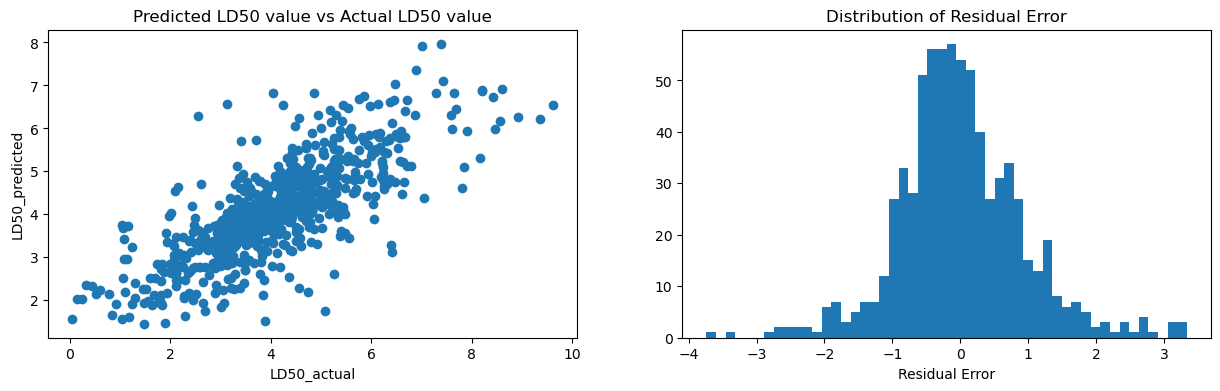

In [348]:
#MLR performance on train dataset

yMLR_pred_train = MLR.predict(x_train)
RMSE_MLR_train, R2_MLR_train = performance(y_train, yMLR_pred_train)
print(f'Root Mean Sqaured Error: {RMSE_MLR_train}', f'R^2 score: {R2_MLR_train}')
print("")

results_plots(y_train, yMLR_pred_train, 50)

Root Mean Sqaured Error: 1.0295425523322532 R^2 score: 0.44575321147275504



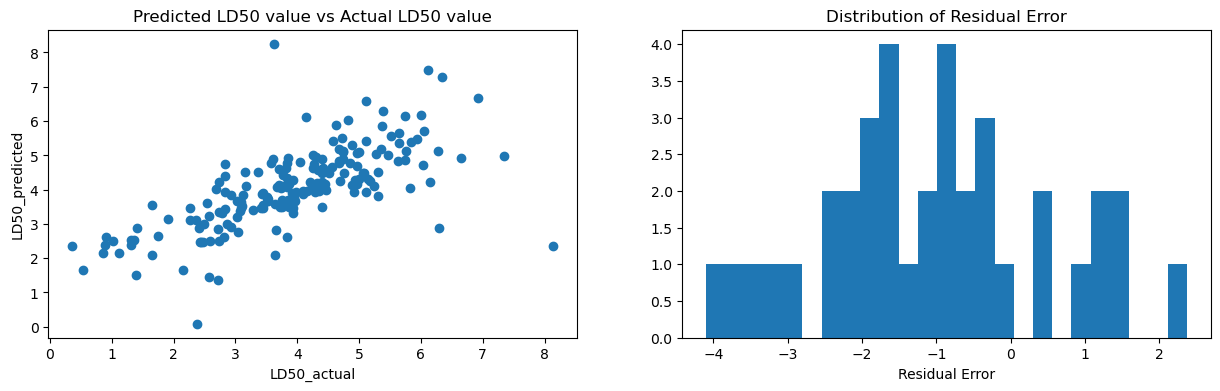

In [350]:
#MLR performance on test dataset
yMLR_pred_test = MLR.predict(x_test)
RMSE_MLR_test, R2_MLR_test = performance(y_test, yMLR_pred_test)

print(f'Root Mean Sqaured Error: {RMSE_MLR_test}', f'R^2 score: {R2_MLR_test}')
print("")

results_plots(y_test, yMLR_pred_test, 25)

#### **Ridge Regression**

In [153]:
#Ridge Regression with Hyperparameter tuning
alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgeregcv.fit(x_train, y_train)

RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
        scoring='neg_mean_squared_error')

Root Mean Sqaured Error: 0.9274795403268454 R^2 score: 0.6019792863186701



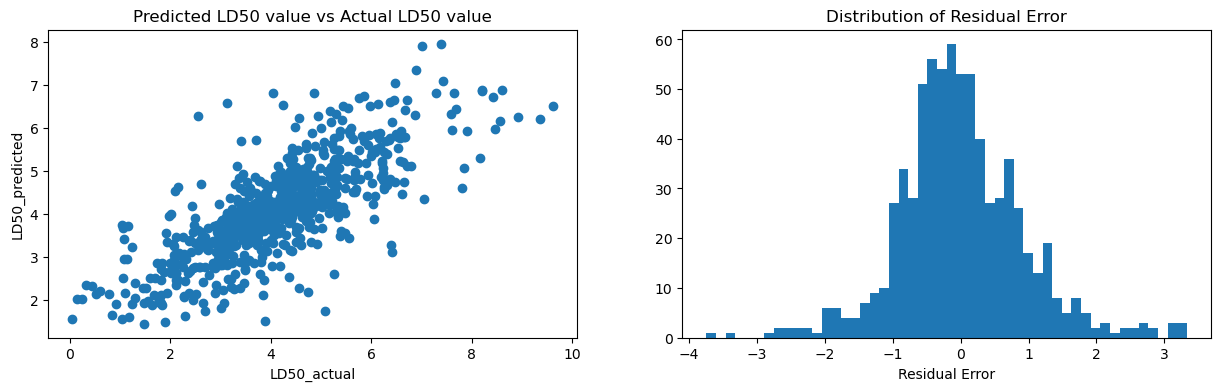

In [351]:
#Ridge Regression performance on train dataset
yRR_pred_train = ridgeregcv.predict(x_train)
RMSE_RR_train, R2_RR_train = performance(y_train, yRR_pred_train)
print(f'Root Mean Sqaured Error: {RMSE_RR_train}', f'R^2 score: {R2_RR_train}')
print("")

results_plots(y_train, yRR_pred_train, 50)

Root Mean Sqaured Error: 1.029295431650061 R^2 score: 0.4460192508049715



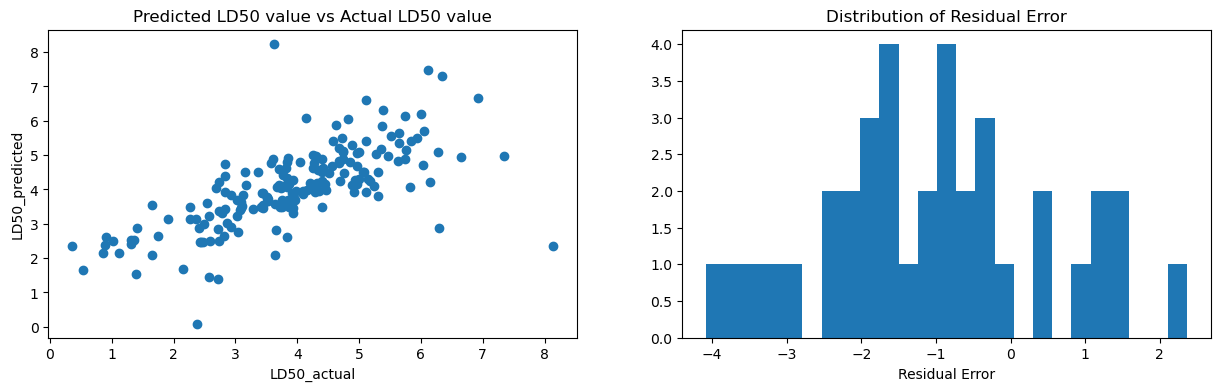

In [352]:
#Ridge Regression performance on train dataset
yRR_pred_test = ridgeregcv.predict(x_test)
RMSE_RR_test, R2_RR_test = performance(y_test, yRR_pred_test)
print(f'Root Mean Sqaured Error: {RMSE_RR_test}', f'R^2 score: {R2_RR_test}')
print("")

results_plots(y_test, yRR_pred_test, 25)

#### **Lasso Regression**

In [156]:
#Lasso Regression with Hyperparameter tuning
lassoregcv = LassoCV(n_alphas=100, random_state=1)
lassoregcv.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(random_state=1)

Root Mean Sqaured Error: 0.9274840088463318 R^2 score: 0.6019754510478696



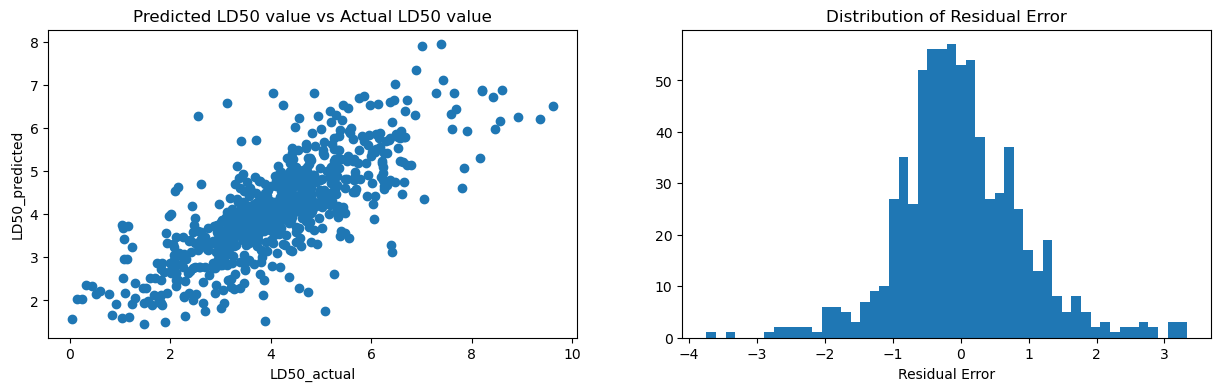

In [353]:
#Lasso Regression performance on train dataset
yLR_pred_train = lassoregcv.predict(x_train)
RMSE_LR_train, R2_LR_train = performance(y_train, yLR_pred_train)
print(f'Root Mean Sqaured Error: {RMSE_LR_train}', f'R^2 score: {R2_LR_train}')
print("")

yLR_pred_train = pd.DataFrame(yLR_pred_train)

results_plots(y_train, yLR_pred_train, 50)

Root Mean Sqaured Error: 1.0289142238495461 R^2 score: 0.4464295172260674



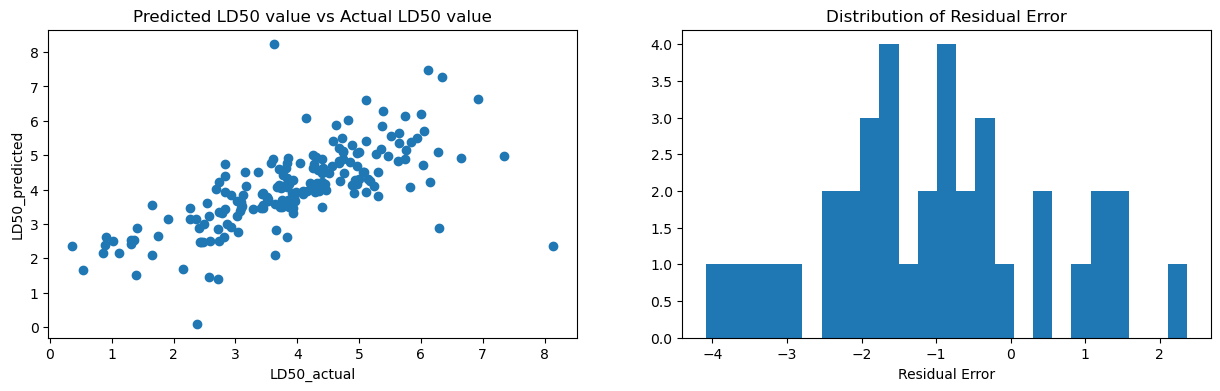

In [354]:
#Lasso Regression performance on train dataset
yLR_pred_test = lassoregcv.predict(x_test)
RMSE_LR_test, R2_LR_test = performance(y_test, yLR_pred_test)
print(f'Root Mean Sqaured Error: {RMSE_LR_test}', f'R^2 score: {R2_LR_test}')
print("")

results_plots(y_test, yLR_pred_test, 25)

#### **Random Forest Regression**

In [124]:
def objective(trial):
    list_trees = [100, 200, 300, 400, 500]
    depth = [1, 5, 10, 20]
    param = {
        'n_estimators' : trial.suggest_categorical('n_estimators', list_trees),
        'max_depth' : trial.suggest_categorical('max_depth', depth),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1, 2, 3]),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 4, 8]),
            }
    clf = RandomForestRegressor(**param)
    clf.fit(x_train, y_train)
    return r2_score(y_test, clf.predict(x_test))

In [126]:
# Running parameter search
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-11-27 01:25:06,585] A new study created in memory with name: no-name-a77e08d3-a053-478c-96b9-c6f5ac1b2217
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:07,594] Trial 0 finished with value: 0.5344722160252015 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}. Best is trial 0 with value: 0.5344722160252015.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:07,898] Trial 1 finished with value: 0.3575808942928903 and parameters: {'n_estimators': 300, 'max_depth': 1, 'min_samples_leaf': 2, 'min_s

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:17,042] Trial 17 finished with value: 0.5452817179027554 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8}. Best is trial 16 with value: 0.5488327474476036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:17,415] Trial 18 finished with value: 0.5383996339029007 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}. Best is trial 16 with value: 0.5488327474476036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:25,969] Trial 35 finished with value: 0.3648287199309701 and parameters: {'n_estimators': 200, 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:26,913] Trial 36 finished with value: 0.5420569515151877 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_

[I 2023-11-27 01:25:36,054] Trial 52 finished with value: 0.5418134661322256 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:36,501] Trial 53 finished with value: 0.5391807187725658 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:36,949] Trial 54 finishe

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:46,263] Trial 70 finished with value: 0.5446636154250799 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:46,990] Trial 71 finished with value: 0.5417246203939148 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel

[I 2023-11-27 01:25:57,265] Trial 87 finished with value: 0.5455730897045621 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:58,021] Trial 88 finished with value: 0.5448774793661819 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8}. Best is trial 24 with value: 0.5498604108115036.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\1017423053.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
[I 2023-11-27 01:25:58,230] Trial 89 finish

In [127]:
# fitting the best model
params = study.best_params
RF = RandomForestRegressor(**params)
RF.fit(x_train, y_train)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\126834874.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=300)

Root Mean Sqaured Error: 0.7695058324692153 R^2 score: 0.7260187582200728



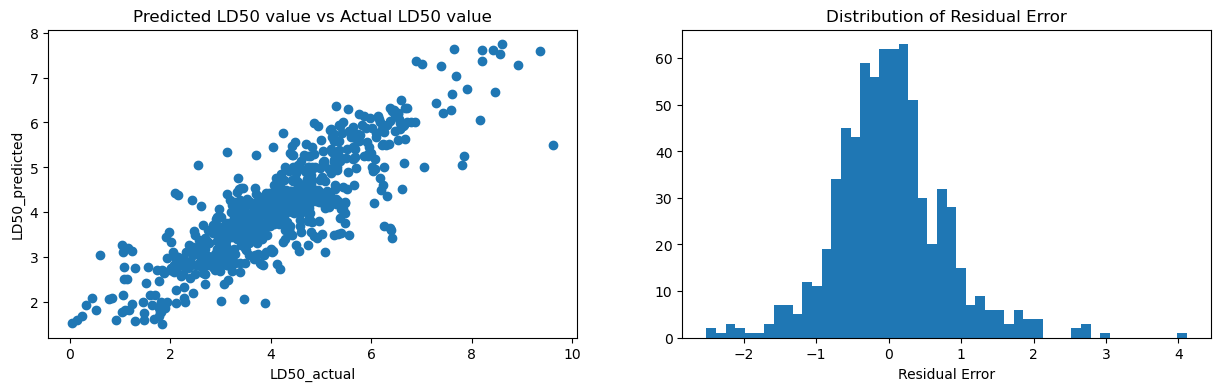

In [355]:
#RF performance on train dataset
yRF_pred_train = RF.predict(x_train)
RMSE_RF_train, R2_RF_train = performance(y_train, yRF_pred_train)
print(f'Root Mean Sqaured Error: {RMSE_RF_train}', f'R^2 score: {R2_RF_train}')
print("")

results_plots(y_train, yRF_pred_train, 50)

Root Mean Sqaured Error: 0.9292490393467633 R^2 score: 0.5484780950020911



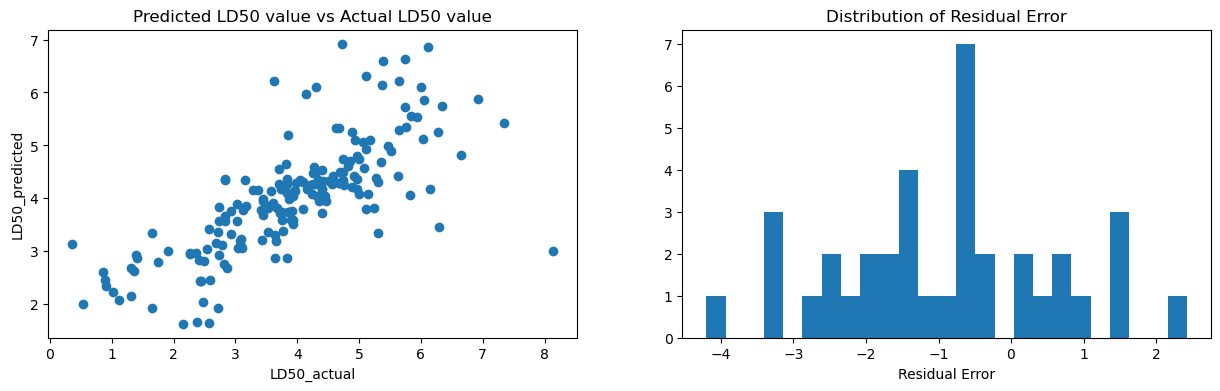

In [358]:
#RF performance on test dataset
yRF_pred_test = RF.predict(x_test)
RMSE_RF_test, R2_RF_test = performance(y_test, yRF_pred_test)
print(f'Root Mean Sqaured Error: {RMSE_RF_test}', f'R^2 score: {R2_RF_test}')
print("")

results_plots(y_test, yRF_pred_test, 25)

#### **XGB Regression**

In [159]:
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400, 500]),
        'max_depth': trial.suggest_int('max_depth', 3, 11),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'colsample_bylevel': trial.suggest_categorical('colsample_bylevel', [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
        'n_jobs': -1
    }

    XGBmod = XGBRegressor(**param)
    XGBmod.fit(x_train, y_train)
    return r2_score(y_test, XGBmod.predict(x_test))

In [160]:
# Running parameter search
study_XGB = optuna.create_study(direction='maximize')
study_XGB.optimize(objective_xgb, n_trials=100)

[I 2023-11-27 01:33:03,916] A new study created in memory with name: no-name-30380019-58f9-4340-ab98-874ce20e34e8
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

[I 2023-11-27 01:33:05,248] Trial 6 finished with value: 0.5033199801441444 and parameters: {'n_estimators': 200, 'max_depth': 11, 'learning_rate': 0.0066390183065344, 'subsample': 0.8, 'colsample_bylevel': 0.6, 'reg_alpha': 0.012566137779922656, 'reg_lambda': 0.008324512672098858}. Best is trial 0 with value: 0.5594585822149577.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

[I 2023-11-27 01:33:09,029] Trial 19 finished with value: 0.5784184180704108 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.009267627699449846, 'subsample': 0.4, 'colsample_bylevel': 0.9, 'reg_alpha': 0.10772539804262085, 'reg_lambda': 6.1297525849910395}. Best is trial 17 with value: 0.5928425472233463.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

[I 2023-11-27 01:33:13,279] Trial 32 finished with value: 0.5926691075621848 and parameters: {'n_estimators': 400, 'max_depth': 11, 'learning_rate': 0.008915556808978979, 'subsample': 0.4, 'colsample_bylevel': 0.9, 'reg_alpha': 0.009841134346238152, 'reg_lambda': 7.79082826358756}. Best is trial 25 with value: 0.5961553848875376.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

[I 2023-11-27 01:33:17,194] Trial 45 finished with value: 0.5851264839918682 and parameters: {'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.008490286817120744, 'subsample': 0.4, 'colsample_bylevel': 0.9, 'reg_alpha': 0.030234135291115734, 'reg_lambda': 6.389502392461977}. Best is trial 33 with value: 0.5974357259857828.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

[I 2023-11-27 01:33:21,240] Trial 58 finished with value: 0.5653366383113417 and parameters: {'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.007607755414309231, 'subsample': 0.4, 'colsample_bylevel': 0.9, 'reg_alpha': 0.017818242300888975, 'reg_lambda': 2.4360574749695387}. Best is trial 53 with value: 0.5975646711062452.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

[I 2023-11-27 01:33:25,291] Trial 71 finished with value: 0.5975821582615222 and parameters: {'n_estimators': 400, 'max_depth': 11, 'learning_rate': 0.008518905781016358, 'subsample': 0.4, 'colsample_bylevel': 0.9, 'reg_alpha': 0.040851945235151024, 'reg_lambda': 15.72903224919574}. Best is trial 71 with value: 0.5975821582615222.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

[I 2023-11-27 01:33:29,853] Trial 84 finished with value: 0.5878303557180187 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.008505535365941652, 'subsample': 0.5, 'colsample_bylevel': 0.4, 'reg_alpha': 0.5398852808159873, 'reg_lambda': 47.702500364612874}. Best is trial 79 with value: 0.5985942185459268.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.005, 0.01),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 100),
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\539017260.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 100),
[I 2

In [161]:
# fitting the best model
params_XGB = study_XGB.best_params
XGBR = XGBRegressor(**params_XGB)
XGBR.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.4, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.008516150537471406,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Root Mean Sqaured Error: 0.7231251667879113 R^2 score: 0.7580509335074146



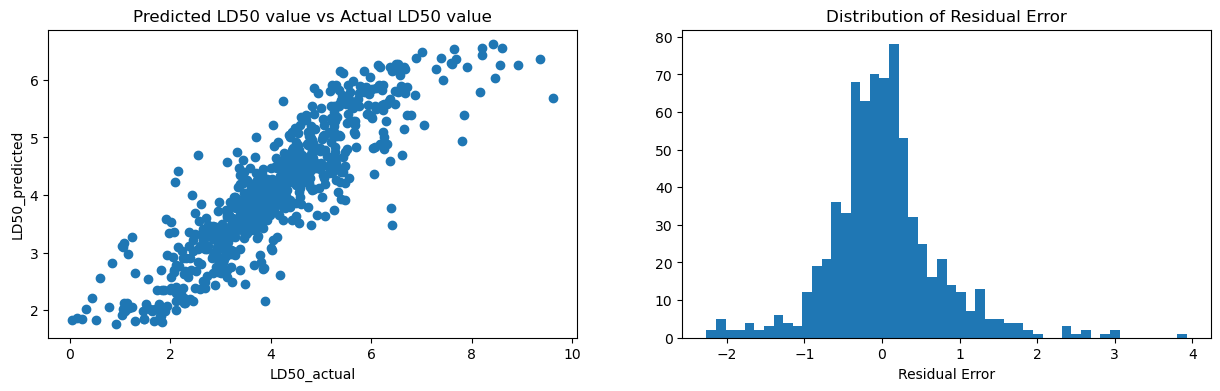

In [359]:
#XGBR performance on train dataset
yXGBR_pred_train = XGBR.predict(x_train)
RMSE_XGBR_train, R2_XGBR_train = performance(y_train, yXGBR_pred_train)
print(f'Root Mean Sqaured Error: {RMSE_XGBR_train}', f'R^2 score: {R2_XGBR_train}')
print("")

results_plots(y_train, yXGBR_pred_train, 50)

Root Mean Sqaured Error: 0.8761622154585804 R^2 score: 0.5985942185459268



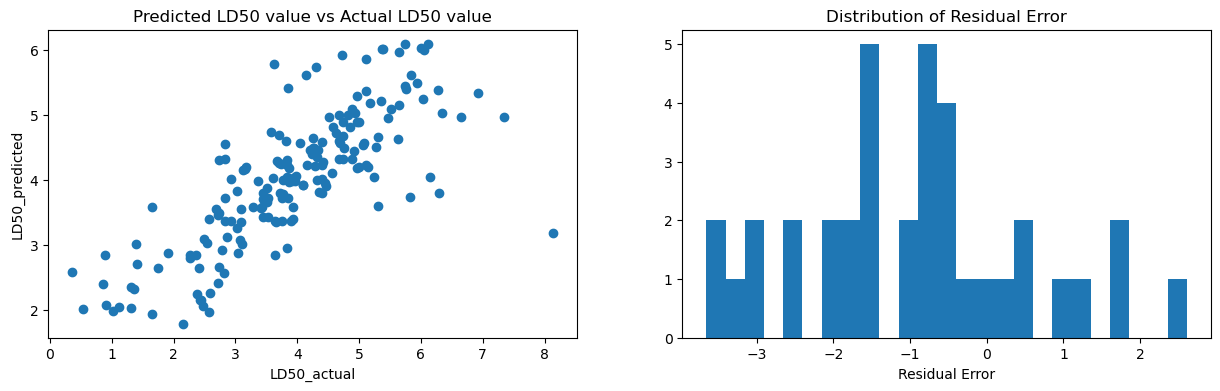

In [360]:
#XGBR performance on test dataset
yXGBR_pred_test = XGBR.predict(x_test)
RMSE_XGBR_test, R2_XGBR_test = performance(y_test, yXGBR_pred_test)
print(f'Root Mean Sqaured Error: {RMSE_XGBR_test}', f'R^2 score: {R2_XGBR_test}')
print("")

results_plots(y_test, yXGBR_pred_test, 25)

#### **Support Vector Regression**

In [180]:
def objective_svr(trial):
    param = {
        'C': trial.suggest_loguniform('C', 1e-3, 1e3),  # Regularization parameter
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e3),
        'degree': trial.suggest_int('degree', 2, 5)
    }

    SVmod = svm.SVR(**param)
    SVmod.fit(x_train, y_train)
    return r2_score(y_test, SVmod.predict(x_test))

In [181]:
# Running parameter search
study_svr = optuna.create_study(direction='maximize')
study_svr.optimize(objective_svr, n_trials=25)

[I 2023-11-27 01:52:56,477] A new study created in memory with name: no-name-66aa70a4-dff1-4867-94df-53dc6cf77d3b
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3),  # Regularization parameter
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e3),
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3),  # Regularization parameter
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e3),
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-11-27 01:52:56,807] Trial 8 finished with value: 0

[I 2023-11-27 01:52:57,097] Trial 15 finished with value: -0.0037363276051343153 and parameters: {'C': 0.001226283852250561, 'gamma': 0.0011550775498464561, 'degree': 4}. Best is trial 12 with value: 0.5498988763717048.
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3),  # Regularization parameter
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e3),
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A co

C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3),  # Regularization parameter
C:\Users\Abhi\AppData\Local\Temp\ipykernel_11484\3873289821.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e3),
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-11-27 01:52:57,410] Trial 23 finished with value: 

In [188]:
# fitting the best model
params_svr = study_svr.best_params
SVR = svm.SVR(**params_svr)
SVR.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.16500503680430478, degree=2, gamma=0.34086039539857266)

Root Mean Sqaured Error: 0.9014047096953606 R^2 score: 0.6240443260562665



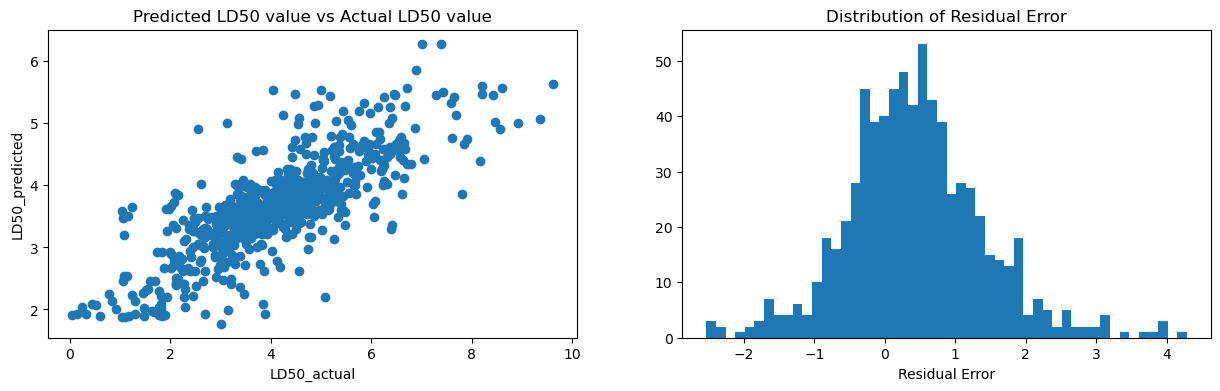

In [361]:
#NN performance on train dataset
ySVR_pred_train = SVR.predict(x_train)
RMSE_SVR_train, R2_SVR_train = performance(y_train, ySVR_pred_train)
print(f'Root Mean Sqaured Error: {RMSE_SVR_train}', f'R^2 score: {R2_SVR_train}')
print("")

results_plots(y_train, yNN_pred_train, 50)

Root Mean Sqaured Error: 0.9041874239254121 R^2 score: 0.572504539556113



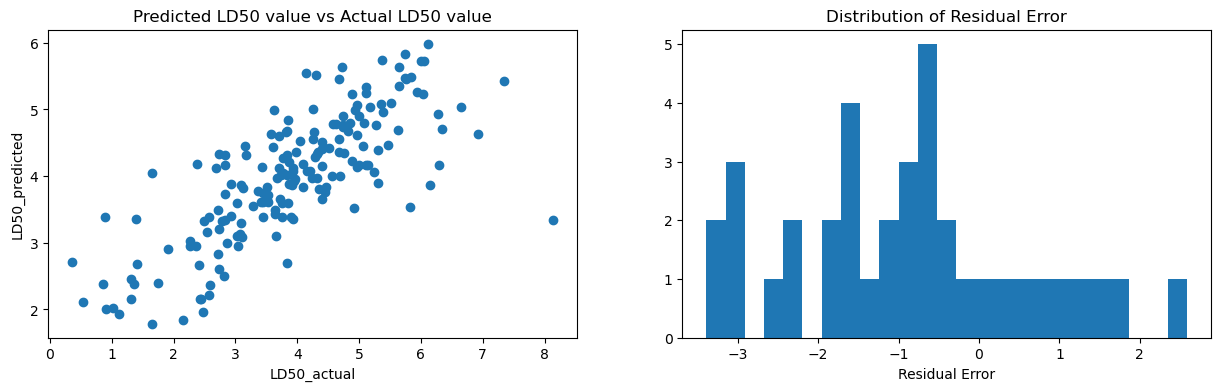

In [362]:
#NN performance on train dataset
ySVR_pred_test = SVR.predict(x_test)
RMSE_SVR_test, R2_SVR_test = performance(y_test, ySVR_pred_test)
print(f'Root Mean Sqaured Error: {RMSE_SVR_test}', f'R^2 score: {R2_SVR_test}')
print("")

results_plots(y_test, ySVR_pred_test, 25)

## **Feature Importance**

The most important feature are:  ['MLOGP', 'SM1_Dz(Z)', 'GATS1i', 'CIC0', 'NdssC', 'NdsCH']
           Feature_importance
MLOGP                0.683177
SM1_Dz(Z)            0.149567
GATS1i               0.074027
CIC0                 0.040906
NdssC                0.026751
NdsCH                0.025571


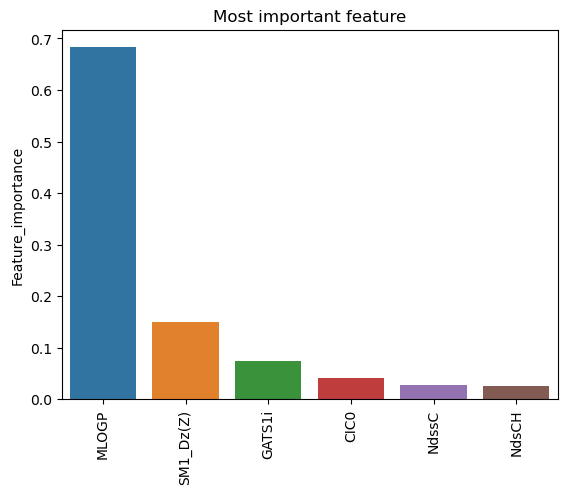

In [194]:
# Fet feature importances
FI = pd.DataFrame(RF.feature_importances_, x_train.columns, columns=['Feature_importance'])
FI = FI.sort_values(by = 'Feature_importance', ascending = False).head(10)
print('The most important feature are: ', list(FI.index))
print(FI)

# plot feature importances
ax = sns.barplot(data = FI, x = FI.index, y = FI['Feature_importance'])
ax.tick_params(axis='x', rotation=90)
plt.title('Most important feature')
plt.show()